## Predict whether the cancer is benign or malignant

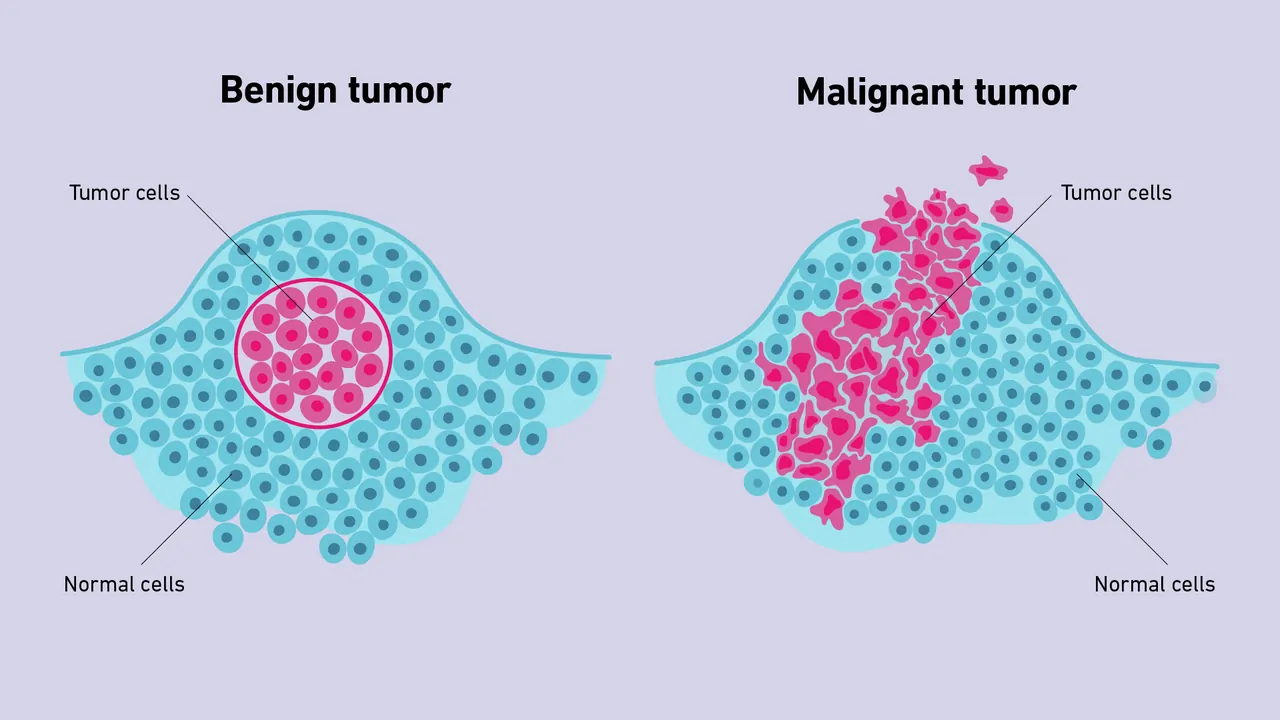

The Breast Cancer Wisconsin (Diagnostic) dataset is a well-known collection of data used extensively in machine learning and medical research. It originates from digitized images of fine needle aspirates (FNA) of breast masses. The dataset contains various features extracted from these images, which can aid in the diagnosis of breast cancer. Let’s delve into the insights that can be derived from this dataset:

# About the data set

## Attribute Information:

 
1. Diagnosis (Target Variable):
 
The diagnosis column contains two classes: Malignant (M =1 ) and Benign (B = 0). These labels represent whether the tumor is cancerous (malignant) or non-cancerous (benign). This is the target variable we want to predict.


## Ten real-valued features are computed for each cell nucleus:

a. Radius (Mean of Distances):
Represents the average distance from the center to points on the tumor’s perimeter.


b. Texture (Standard Deviation of Gray-Scale Values):
Measures the variation in gray-scale intensity of the tumor mass.


c. Perimeter:
The total length of the tumor’s boundary.


d. Area:
Represents the area of the tumor.


e. Smoothness (Local Variation in Radius Lengths):
Describes the variation in radius lengths within the tumor.


f. Compactness (Perimeter^2 / Area - 1.0):
Combines information about the tumor’s shape (perimeter) and size (area).


g. Concavity (Severity of Concave Portions):
Measures the severity of concave regions in the tumor contour.


h. Concave Points (Number of Concave Portions):
Counts the number of concave portions in the tumor boundary.


i. Symmetry:
Reflects the symmetry of the tumor shape.


j. Fractal Dimension (“Coastline Approximation” - 1):
Describes the complexity of the tumor boundary.



The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant



Remember that accurate diagnosis requires a combination of clinical expertise and machine learning. While the dataset provides valuable insights, it’s crucial to collaborate with medical professionals for accurate predictions and patient care.

# Step 1:- Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.express as px
pd.set_option('display.max_columns', None)

#Sampling methods
from sklearn.model_selection import train_test_split, cross_val_score

#feature engineering
import datetime as dt
from sklearn.preprocessing import MinMaxScaler

#Feature Selection
from boruta import BorutaPy

#Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings("ignore")

## load data

In [2]:
df = pd.read_csv(r"C:\Users\Acer\Downloads\archive (3)\data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
# Checking the information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
# Checking for Summary statistics.

df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [8]:
df.shape

(569, 33)

<Axes: >

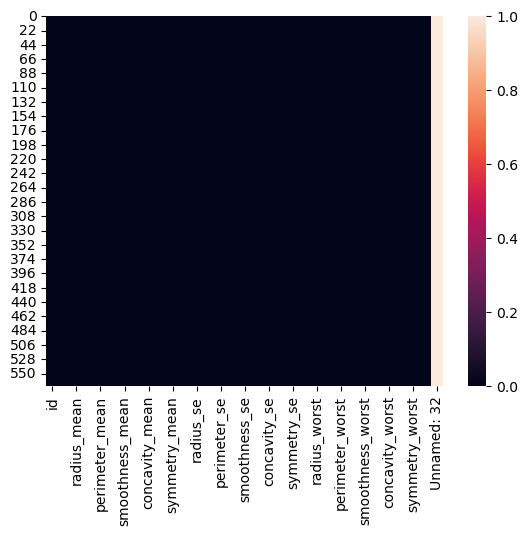

In [9]:
sns.heatmap(df.isnull())

In [10]:
# remove id column and unnamed column

df.drop(['Unnamed: 32','id'],axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
df.shape

(569, 31)

In [12]:
# target column replace with 0 and 1

df.diagnosis = [1 if value == 'M' else 0 for value in df.diagnosis]

In [13]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [14]:
df.diagnosis

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [15]:
print("Column names:", df.columns.tolist())

Column names: ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [16]:
df[df.duplicated()]

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst


### Checking for missing values

In [17]:
miss_val = df.isnull().sum()
miss_val[miss_val>0]

Series([], dtype: int64)

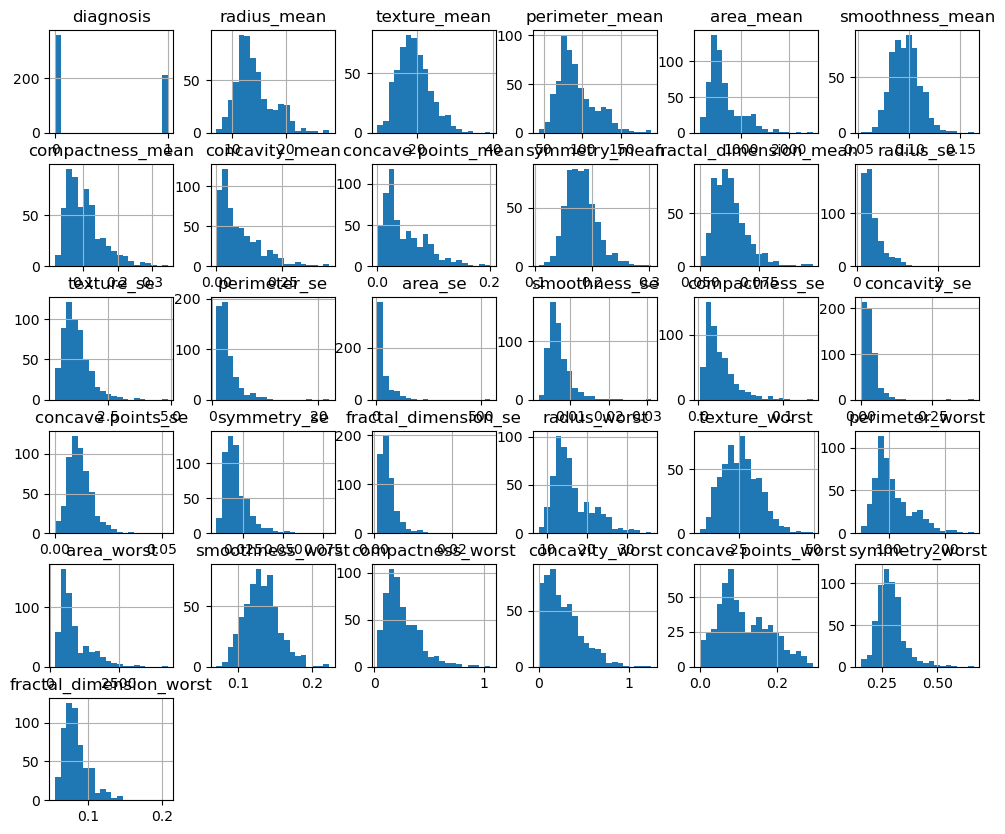

In [18]:
df.hist(figsize=(12, 10), bins=20)
plt.show()

# Analyzing features

Featuer Name = radius_mean


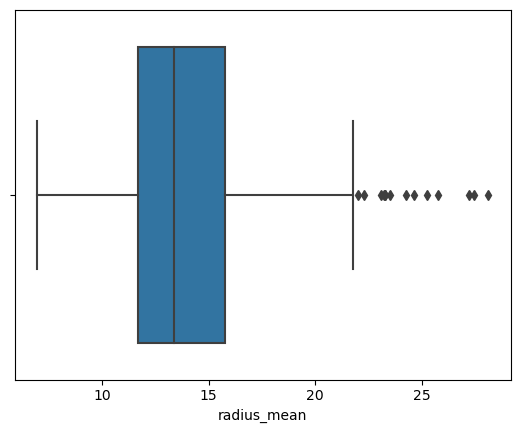

count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: radius_mean, dtype: float64

Featuer Name = texture_mean


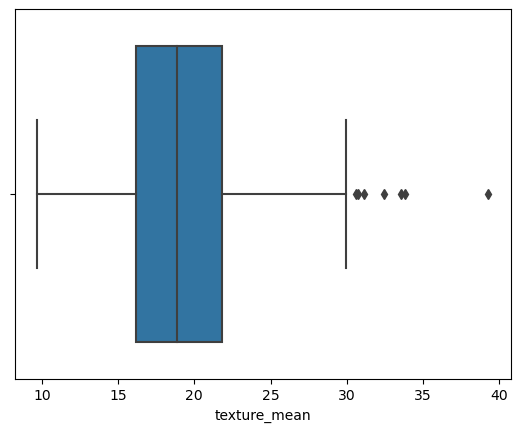

count    569.000000
mean      19.289649
std        4.301036
min        9.710000
25%       16.170000
50%       18.840000
75%       21.800000
max       39.280000
Name: texture_mean, dtype: float64

Featuer Name = perimeter_mean


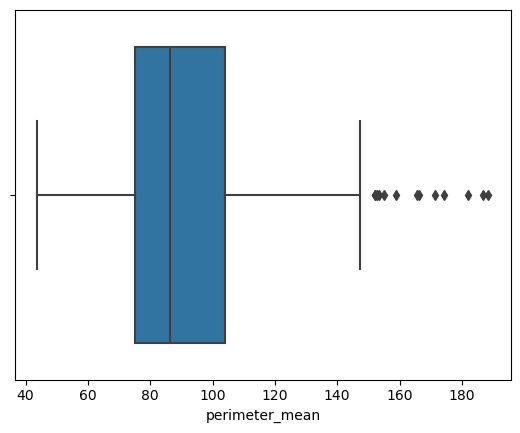

count    569.000000
mean      91.969033
std       24.298981
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      188.500000
Name: perimeter_mean, dtype: float64

Featuer Name = area_mean


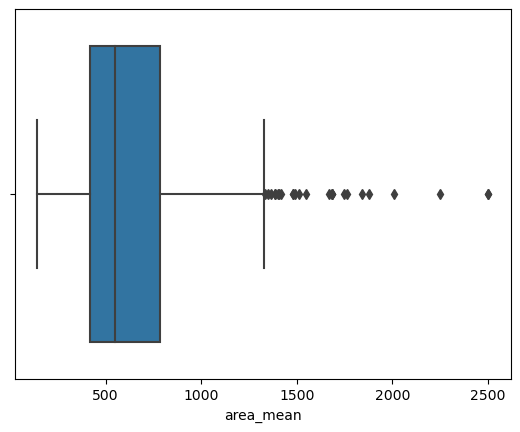

count     569.000000
mean      654.889104
std       351.914129
min       143.500000
25%       420.300000
50%       551.100000
75%       782.700000
max      2501.000000
Name: area_mean, dtype: float64

Featuer Name = smoothness_mean


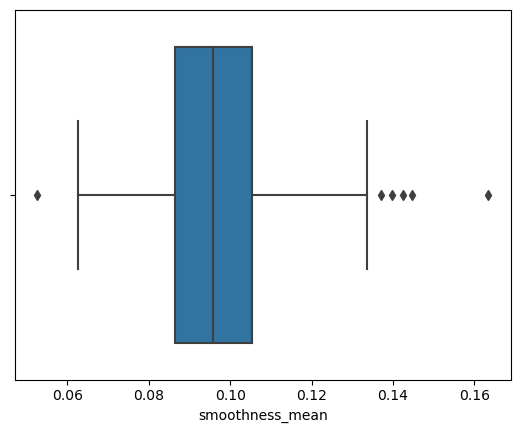

count    569.000000
mean       0.096360
std        0.014064
min        0.052630
25%        0.086370
50%        0.095870
75%        0.105300
max        0.163400
Name: smoothness_mean, dtype: float64

Featuer Name = compactness_mean


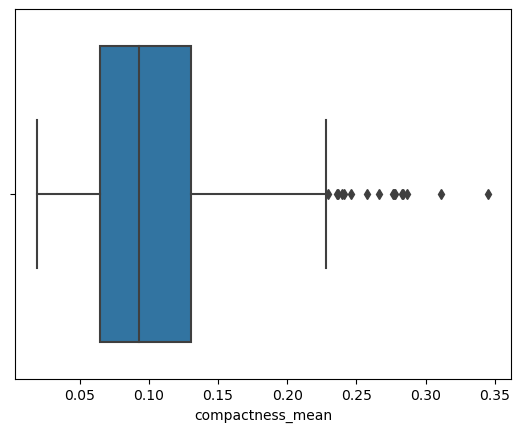

count    569.000000
mean       0.104341
std        0.052813
min        0.019380
25%        0.064920
50%        0.092630
75%        0.130400
max        0.345400
Name: compactness_mean, dtype: float64

Featuer Name = concavity_mean


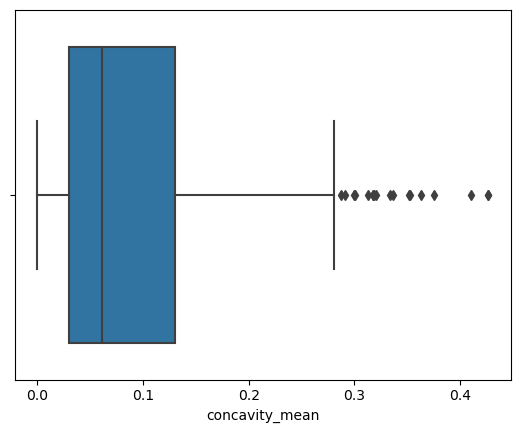

count    569.000000
mean       0.088799
std        0.079720
min        0.000000
25%        0.029560
50%        0.061540
75%        0.130700
max        0.426800
Name: concavity_mean, dtype: float64

Featuer Name = concave points_mean


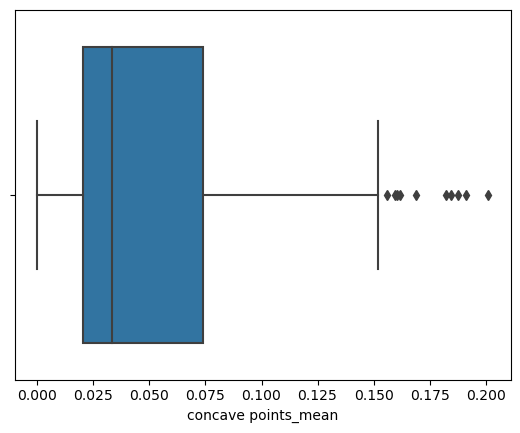

count    569.000000
mean       0.048919
std        0.038803
min        0.000000
25%        0.020310
50%        0.033500
75%        0.074000
max        0.201200
Name: concave points_mean, dtype: float64

Featuer Name = symmetry_mean


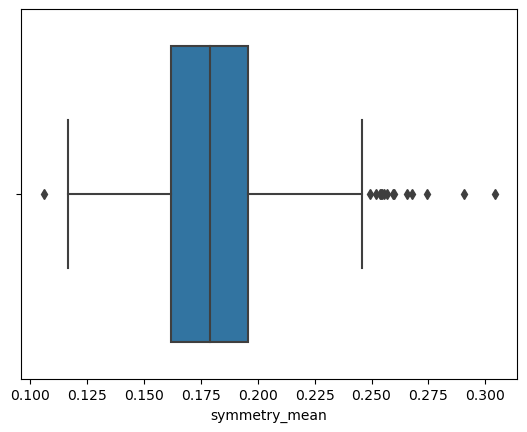

count    569.000000
mean       0.181162
std        0.027414
min        0.106000
25%        0.161900
50%        0.179200
75%        0.195700
max        0.304000
Name: symmetry_mean, dtype: float64

Featuer Name = fractal_dimension_mean


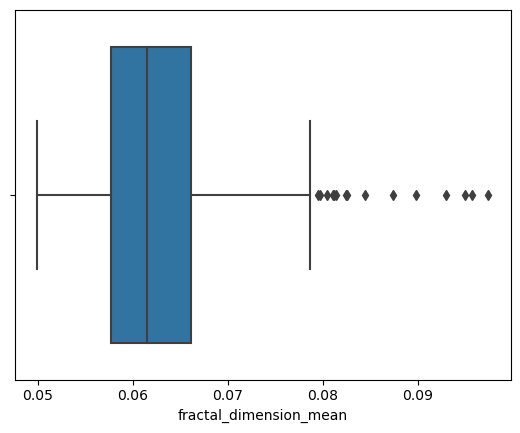

count    569.000000
mean       0.062798
std        0.007060
min        0.049960
25%        0.057700
50%        0.061540
75%        0.066120
max        0.097440
Name: fractal_dimension_mean, dtype: float64

Featuer Name = radius_se


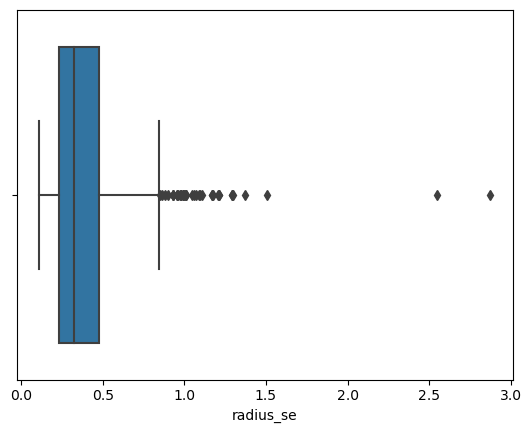

count    569.000000
mean       0.405172
std        0.277313
min        0.111500
25%        0.232400
50%        0.324200
75%        0.478900
max        2.873000
Name: radius_se, dtype: float64

Featuer Name = texture_se


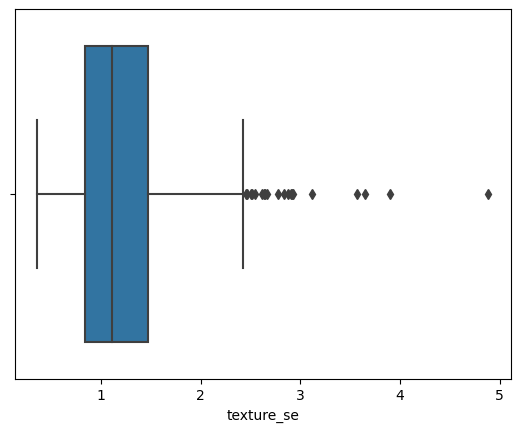

count    569.000000
mean       1.216853
std        0.551648
min        0.360200
25%        0.833900
50%        1.108000
75%        1.474000
max        4.885000
Name: texture_se, dtype: float64

Featuer Name = perimeter_se


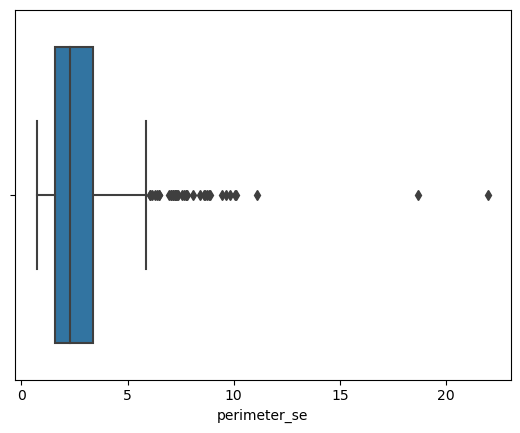

count    569.000000
mean       2.866059
std        2.021855
min        0.757000
25%        1.606000
50%        2.287000
75%        3.357000
max       21.980000
Name: perimeter_se, dtype: float64

Featuer Name = area_se


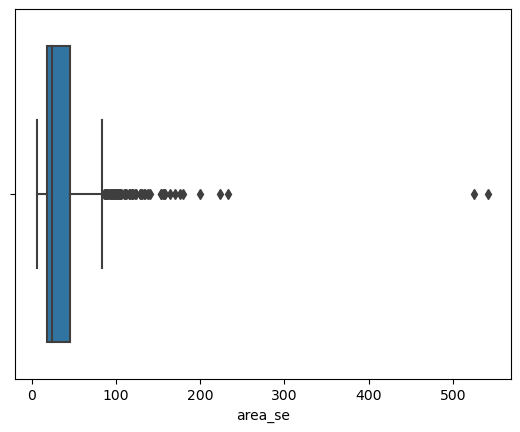

count    569.000000
mean      40.337079
std       45.491006
min        6.802000
25%       17.850000
50%       24.530000
75%       45.190000
max      542.200000
Name: area_se, dtype: float64

Featuer Name = smoothness_se


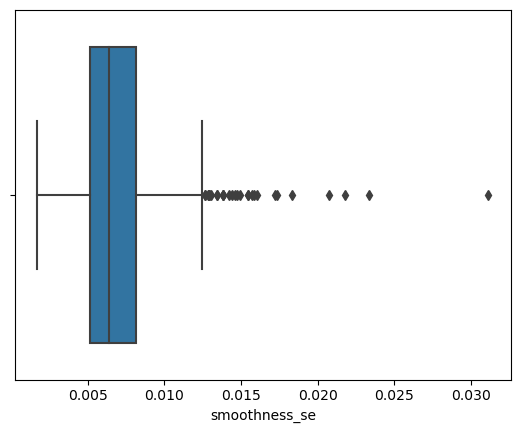

count    569.000000
mean       0.007041
std        0.003003
min        0.001713
25%        0.005169
50%        0.006380
75%        0.008146
max        0.031130
Name: smoothness_se, dtype: float64

Featuer Name = compactness_se


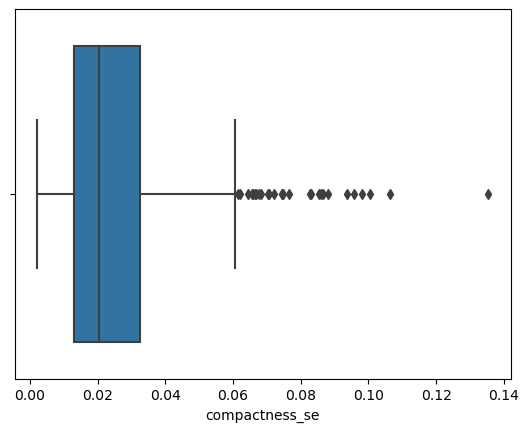

count    569.000000
mean       0.025478
std        0.017908
min        0.002252
25%        0.013080
50%        0.020450
75%        0.032450
max        0.135400
Name: compactness_se, dtype: float64

Featuer Name = concavity_se


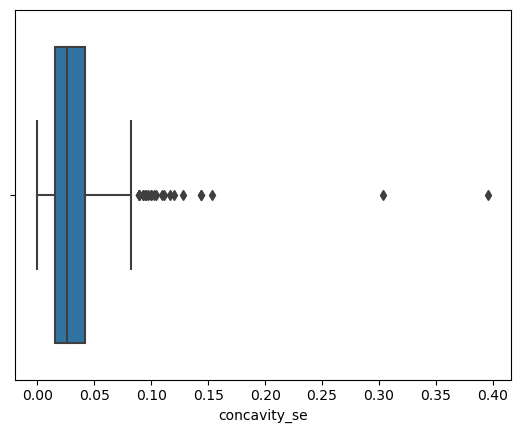

count    569.000000
mean       0.031894
std        0.030186
min        0.000000
25%        0.015090
50%        0.025890
75%        0.042050
max        0.396000
Name: concavity_se, dtype: float64

Featuer Name = concave points_se


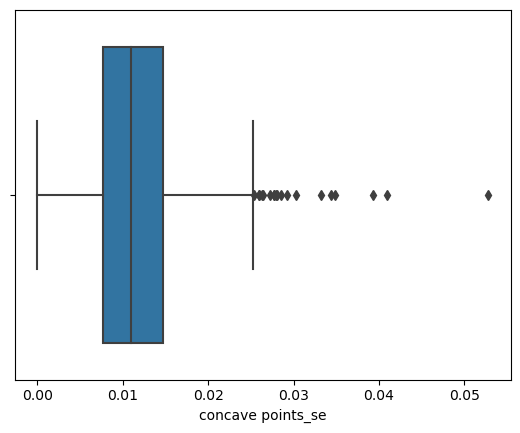

count    569.000000
mean       0.011796
std        0.006170
min        0.000000
25%        0.007638
50%        0.010930
75%        0.014710
max        0.052790
Name: concave points_se, dtype: float64

Featuer Name = symmetry_se


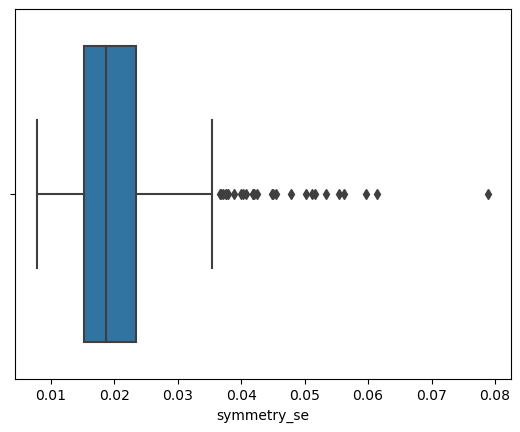

count    569.000000
mean       0.020542
std        0.008266
min        0.007882
25%        0.015160
50%        0.018730
75%        0.023480
max        0.078950
Name: symmetry_se, dtype: float64

Featuer Name = fractal_dimension_se


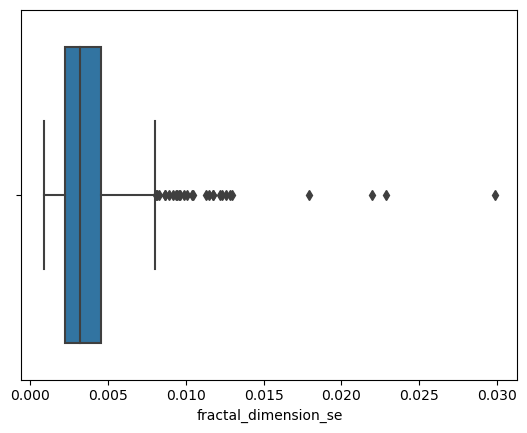

count    569.000000
mean       0.003795
std        0.002646
min        0.000895
25%        0.002248
50%        0.003187
75%        0.004558
max        0.029840
Name: fractal_dimension_se, dtype: float64

Featuer Name = radius_worst


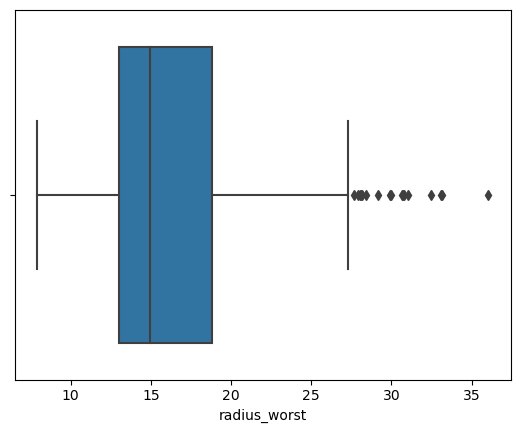

count    569.000000
mean      16.269190
std        4.833242
min        7.930000
25%       13.010000
50%       14.970000
75%       18.790000
max       36.040000
Name: radius_worst, dtype: float64

Featuer Name = texture_worst


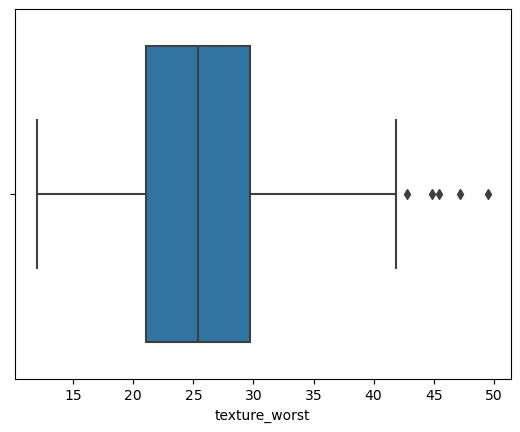

count    569.000000
mean      25.677223
std        6.146258
min       12.020000
25%       21.080000
50%       25.410000
75%       29.720000
max       49.540000
Name: texture_worst, dtype: float64

Featuer Name = perimeter_worst


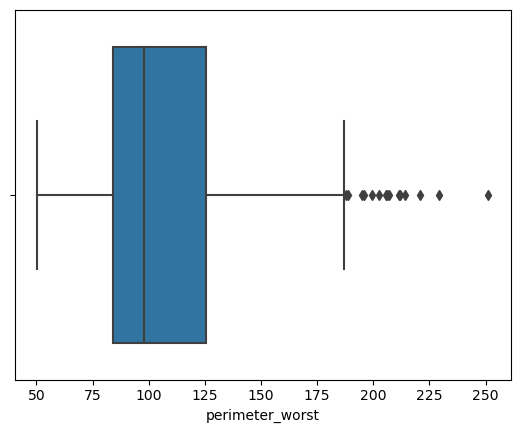

count    569.000000
mean     107.261213
std       33.602542
min       50.410000
25%       84.110000
50%       97.660000
75%      125.400000
max      251.200000
Name: perimeter_worst, dtype: float64

Featuer Name = area_worst


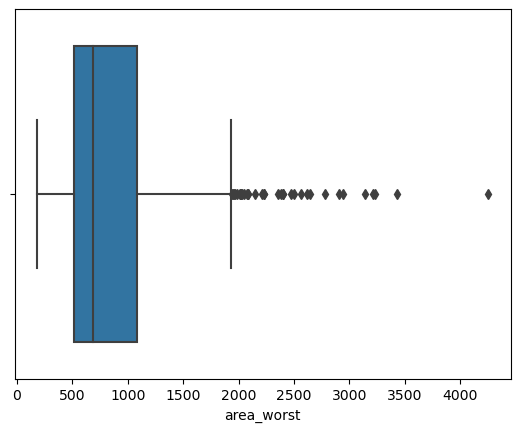

count     569.000000
mean      880.583128
std       569.356993
min       185.200000
25%       515.300000
50%       686.500000
75%      1084.000000
max      4254.000000
Name: area_worst, dtype: float64

Featuer Name = smoothness_worst


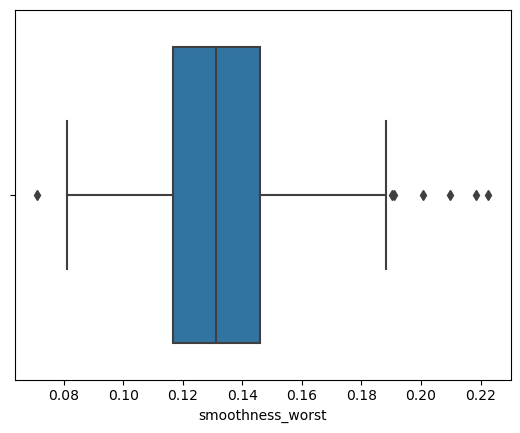

count    569.000000
mean       0.132369
std        0.022832
min        0.071170
25%        0.116600
50%        0.131300
75%        0.146000
max        0.222600
Name: smoothness_worst, dtype: float64

Featuer Name = compactness_worst


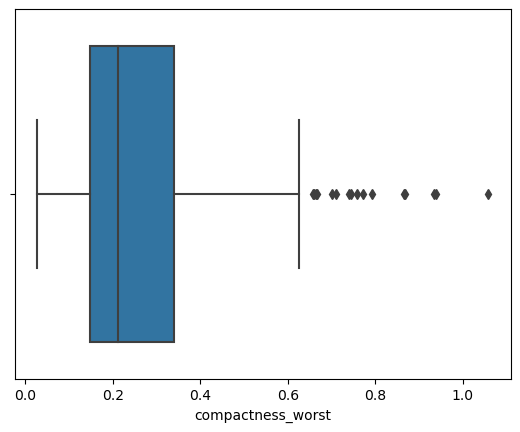

count    569.000000
mean       0.254265
std        0.157336
min        0.027290
25%        0.147200
50%        0.211900
75%        0.339100
max        1.058000
Name: compactness_worst, dtype: float64

Featuer Name = concavity_worst


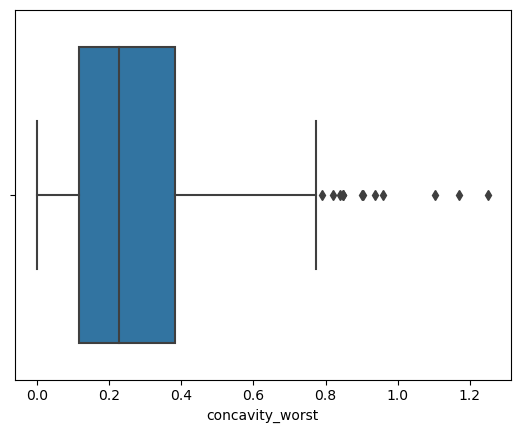

count    569.000000
mean       0.272188
std        0.208624
min        0.000000
25%        0.114500
50%        0.226700
75%        0.382900
max        1.252000
Name: concavity_worst, dtype: float64

Featuer Name = concave points_worst


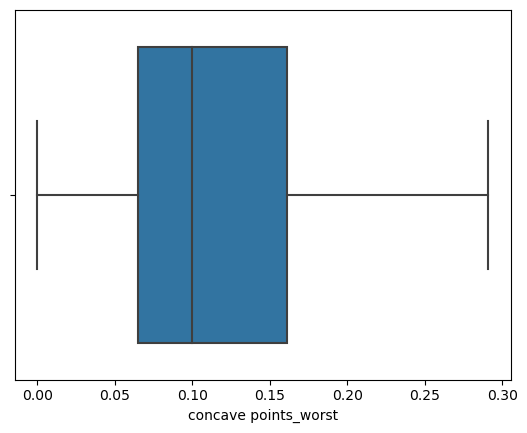

count    569.000000
mean       0.114606
std        0.065732
min        0.000000
25%        0.064930
50%        0.099930
75%        0.161400
max        0.291000
Name: concave points_worst, dtype: float64

Featuer Name = symmetry_worst


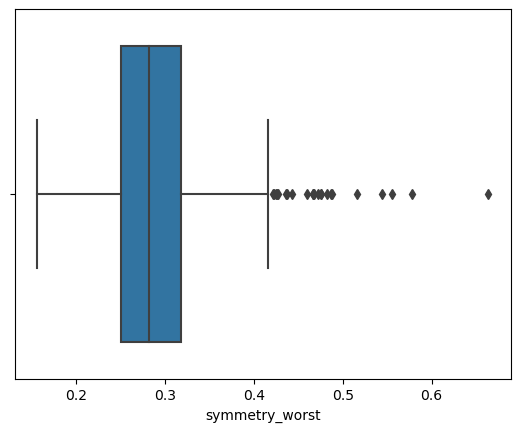

count    569.000000
mean       0.290076
std        0.061867
min        0.156500
25%        0.250400
50%        0.282200
75%        0.317900
max        0.663800
Name: symmetry_worst, dtype: float64

Featuer Name = fractal_dimension_worst


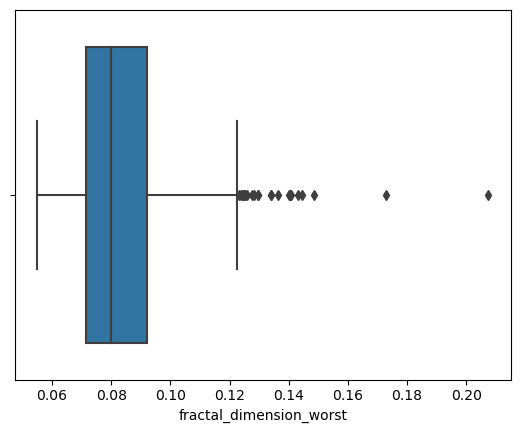

count    569.000000
mean       0.083946
std        0.018061
min        0.055040
25%        0.071460
50%        0.080040
75%        0.092080
max        0.207500
Name: fractal_dimension_worst, dtype: float64

In [19]:
num_cols = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

for i in num_cols:
    print(f'Featuer Name = {i}')
    sns.boxplot(x = df[i])
    plt.show()
    display(df[i].describe())

(array([357.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 212.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

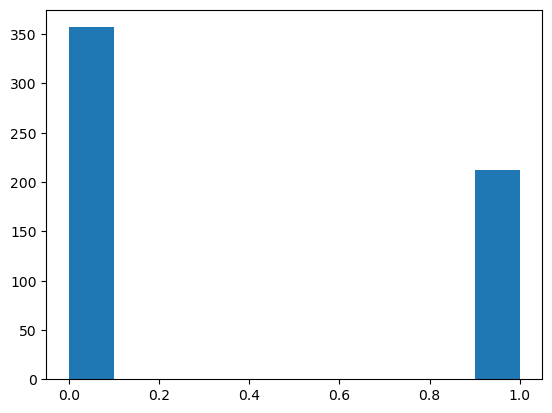

In [20]:
plt.hist(df.diagnosis)

## Insights

### Relationship between features and diagnosis

## radius_mean vs diagonosis

In [34]:
df.groupby('diagnosis')['radius_mean'].mean()

diagnosis
0    12.146524
1    17.462830
Name: radius_mean, dtype: float64

#### Malignant tumors have larger radii due to their aggressive growth. Benign tumors usually have smaller radii.

## Texture vs diagnosis

In [35]:
df.groupby('diagnosis')['texture_mean'].mean()

diagnosis
0    17.914762
1    21.604906
Name: texture_mean, dtype: float64

#### Texture can differ significantly between malignant and benign tumors. Malignant tumors exhibit irregular textures.

## perimeter vs diagnosis

In [37]:
df.groupby('diagnosis')['perimeter_mean'].mean()

diagnosis
0     78.075406
1    115.365377
Name: perimeter_mean, dtype: float64

#### Malignant tumors often have larger perimeters due to their irregular shapes.

## Area vs diagnosis

In [38]:
df.groupby('diagnosis')['area_mean'].mean()

diagnosis
0    462.790196
1    978.376415
Name: area_mean, dtype: float64

#### Malignant tumors have larger areas than benign ones.

## Smoothness vs diagnosis

In [39]:
df.groupby('diagnosis')['smoothness_mean'].mean()

diagnosis
0    0.092478
1    0.102898
Name: smoothness_mean, dtype: float64

#### Benign tumors have lower smoothness.

## Compactness vs diagnosis

In [40]:
df.groupby('diagnosis')['compactness_mean'].mean()

diagnosis
0    0.080085
1    0.145188
Name: compactness_mean, dtype: float64

#### Higher compactness values indicate more irregular shapes. Malignant tumors often have higher compactness.

## Concavity vs diagnosis

In [41]:
df.groupby('diagnosis')['concavity_mean'].mean()

diagnosis
0    0.046058
1    0.160775
Name: concavity_mean, dtype: float64

#### Benign tumors exhibit deeper concavities.

## Concave Points vs diagnosis

In [42]:
df.groupby('diagnosis')['concave points_mean'].mean()

diagnosis
0    0.025717
1    0.087990
Name: concave points_mean, dtype: float64

#### Malignant tumors tend to have more concave points.

## Symmetry vs diagnosis

In [43]:
df.groupby('diagnosis')['symmetry_mean'].mean()

diagnosis
0    0.174186
1    0.192909
Name: symmetry_mean, dtype: float64

#### Benign tumors are often more symmetric.

## Fractal Dimension vs diagnosis

In [44]:
df.groupby('diagnosis')['fractal_dimension_mean'].mean()

diagnosis
0    0.062867
1    0.062680
Name: fractal_dimension_mean, dtype: float64

#### Higher fractal dimensions indicate more intricate shapes. Benign tumors have higher fractal dimensions.

### Dividing into target variable and independent variables

In [21]:
X = df.drop(['diagnosis'],axis=1)  
y = df['diagnosis']                    # target variable

In [22]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [23]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

## Normalize the data

In [24]:
from sklearn.preprocessing import StandardScaler

# create a scalar object
scaler = StandardScaler()

# fit the scalar to the data and transform the data
X_scaled = scaler.fit_transform(X)

In [25]:
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

## split the data

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=42)

## train the model

In [27]:
from sklearn.linear_model import LogisticRegression

# create the lr model
lr = LogisticRegression()

# train the model on training data
lr.fit(X_train,y_train)

# predict the target variable on test data
y_pred = lr.predict(X_test)

In [28]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [29]:
y_test

204    0
70     1
131    1
431    0
540    0
      ..
69     0
542    0
176    0
501    1
247    0
Name: diagnosis, Length: 171, dtype: int64

In [30]:
y_proba = lr.predict_proba(X_test)[:, 1]

In [31]:
y_proba

array([1.19411865e-01, 9.99985481e-01, 9.96530931e-01, 5.60551400e-04,
       8.83031478e-05, 1.00000000e+00, 9.99999996e-01, 9.57845803e-01,
       4.06047396e-01, 7.17416370e-04, 5.21770509e-02, 9.85847432e-01,
       6.58389023e-03, 8.35534549e-01, 2.15366411e-03, 9.98315023e-01,
       2.18276613e-03, 1.12518286e-05, 7.96661334e-07, 9.99998137e-01,
       7.42777420e-02, 1.10988423e-02, 9.99999990e-01, 8.02555906e-05,
       1.28449996e-03, 4.70447061e-04, 1.45424964e-03, 8.72918263e-03,
       3.60515946e-03, 9.99980680e-01, 8.22121484e-04, 1.82609784e-04,
       1.86010938e-03, 5.59085864e-03, 1.56463781e-04, 2.93672233e-03,
       9.17831497e-01, 4.26884557e-03, 9.99863170e-01, 4.20366382e-02,
       9.85619987e-05, 9.99507129e-01, 4.19162870e-03, 1.12664183e-03,
       2.74042621e-02, 6.60673853e-02, 5.10050269e-04, 3.31719436e-04,
       3.19010060e-02, 1.41164899e-03, 9.99844390e-01, 9.99999893e-01,
       2.61482028e-01, 2.87527156e-02, 2.14316230e-05, 9.96049287e-03,
      

## evaluate the model

In [32]:
from sklearn.metrics import confusion_matrix ,accuracy_score,precision_score,f1_score,recall_score,roc_auc_score,roc_curve
from sklearn.metrics import classification_report


Logistic Regression :
Accuracy: 0.9824561403508771
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



Text(0.5, 1.0, 'Confusion Matrix- Logistic Regression')

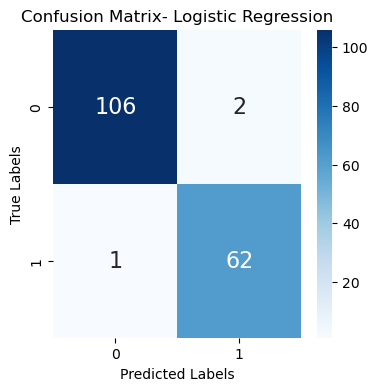

In [33]:
# Create confusion matrix
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

# Calculate ROC curve and AUC-ROC score
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

# Evaluate the model
print("\nLogistic Regression :")
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Create heatmap for model
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={'size': 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix- Logistic Regression')